# Projekt 2: Prediktivní analýza zrušení hotelových rezervací 
**Dataset:** Hotel Booking Demand  
**Cíl:** Klasifikace 

## 1. Definice úlohy a business kontext
Cílem tohoto projektu je vytvořit klasifikační model, který dokáže s vysokou přesností předpovědět, zda bude hotelová rezervace zrušena (atribut `is_canceled`). 

### Proč je to pro hotel důležité?
1. **Optimalizace výnosů (Revenue Management):** Pokud hotel ví, že rezervace bude pravděpodobně zrušena, může pokoj znovu nabídnout včas a předejít ztrátě.
2. **Plánování kapacit a personálu:** Přesná předpověď počtu hostů pomáhá lépe plánovat směny v kuchyni, úklid pokojů a recepci.
3. **Strategie přearezervování (Overbooking):** Hotely často přijímají více rezervací, než mají pokojů. Kvalitní model pomáhá určit bezpečnou míru overbookingu.
4. **Cílený marketing:** Identifikace rizikových rezervací umožňuje hotelu zaslat připomínací e-mail nebo nabídnout slevu na nevratnou zálohu.

## 2. Popis datasetu a přehled atributů
Dataset obsahuje data o rezervacích ve dvou typech hotelů (City a Resort). Celkem se jedná o 32 atributů, které lze rozdělit do několika logických celků:

| Atribut | Datový typ | Význam |
| :--- | :--- | :--- |
| **is_canceled** | Integer (0/1) | **Cílová proměnná.** 1 = zrušeno, 0 = proběhlo. |
| **lead_time** | Integer | Počet dní mezi rezervací a příjezdem. |
| **hotel** | Object | Typ hotelu (Resort Hotel nebo City Hotel). |
| **arrival_date_year/month/day** | Int/Obj | Datum plánovaného příjezdu. |
| **stays_in_weekend/week_nights** | Integer | Počet nocí strávených v hotelu. |
| **adults / children / babies** | Integer | Složení hostů. |
| **meal** | Object | Typ stravování (BB, HB, FB, SC). |
| **country** | Object | Země původu hosta. |
| **market_segment** | Object | Segment trhu (Direct, Corporate, Online TA, atd.). |
| **is_repeated_guest** | Integer (0/1) | Zda se jedná o vracejícího se hosta. |
| **previous_cancellations** | Integer | Počet předchozích zrušených rezervací klientem. |
| **reserved_room_type** | Object | Kód typu pokoje, který byl rezervován. |
| **deposit_type** | Object | Typ zálohy (No Deposit, Non Refund, Refundable). |
| **adr** | Float | Průměrná denní sazba (Average Daily Rate). |
| **required_car_parking_spaces** | Integer | Počet požadovaných parkovacích míst. |
| **total_of_special_requests** | Integer | Počet speciálních požadavků (např. dětská postýlka). |

In [5]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Stažení nejnovější verze datasetu
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

# Sestavení cesty k souboru a načtení
csv_file_path = os.path.join(path, 'hotel_bookings.csv')
df = pd.read_csv(csv_file_path)

# Nastavení vizualizací
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print(f"Dataset úspěšně načten z: {path}")
print(f"Rozsah dat: {df.shape[0]} řádků a {df.shape[1]} sloupců.")
display(df.head())
df.info()

Dataset úspěšně načten z: C:\Users\jirka\.cache\kagglehub\datasets\jessemostipak\hotel-booking-demand\versions\1
Rozsah dat: 119390 řádků a 32 sloupců.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##  Explorativní analýza (EDA)
Než přistoupíme k modelování, musíme pochopit vztahy v datech. Naším cílem je predikce `is_canceled`.

### Vyváženost tříd (Class Imbalance)
Prvním krokem je zjistit, kolik rezervací v našem datasetu je skutečně zrušeno. Pokud by jedna třída výrazně převažovala (např. 95 % ku 5 %), museli bychom použít speciální techniky pro nevyvážená data.

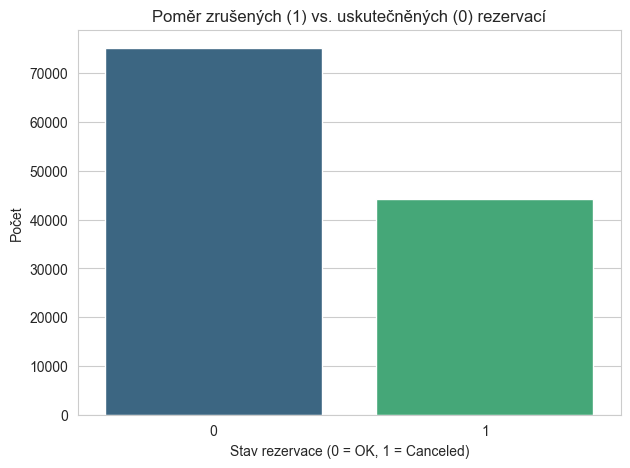

Procentuální zastoupení:
is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64


In [8]:
plt.figure(figsize=(7, 5))
# Přidali jsme hue='is_canceled' a legend=False, aby zmizelo to varování
sns.countplot(data=df, x='is_canceled', hue='is_canceled', palette='viridis', legend=False)
plt.title('Poměr zrušených (1) vs. uskutečněných (0) rezervací')
plt.xlabel('Stav rezervace (0 = OK, 1 = Canceled)')
plt.ylabel('Počet')
plt.show()

print("Procentuální zastoupení:")
print(df['is_canceled'].value_counts(normalize=True) * 100)

### Korelace numerických atributů
Abychom zjistili, které číselné faktory mají nejsilnější lineární vztah k rušení rezervací, vykreslíme korelační heatmapu. To nám pomůže při pozdějším výběru atributů (Feature Selection).

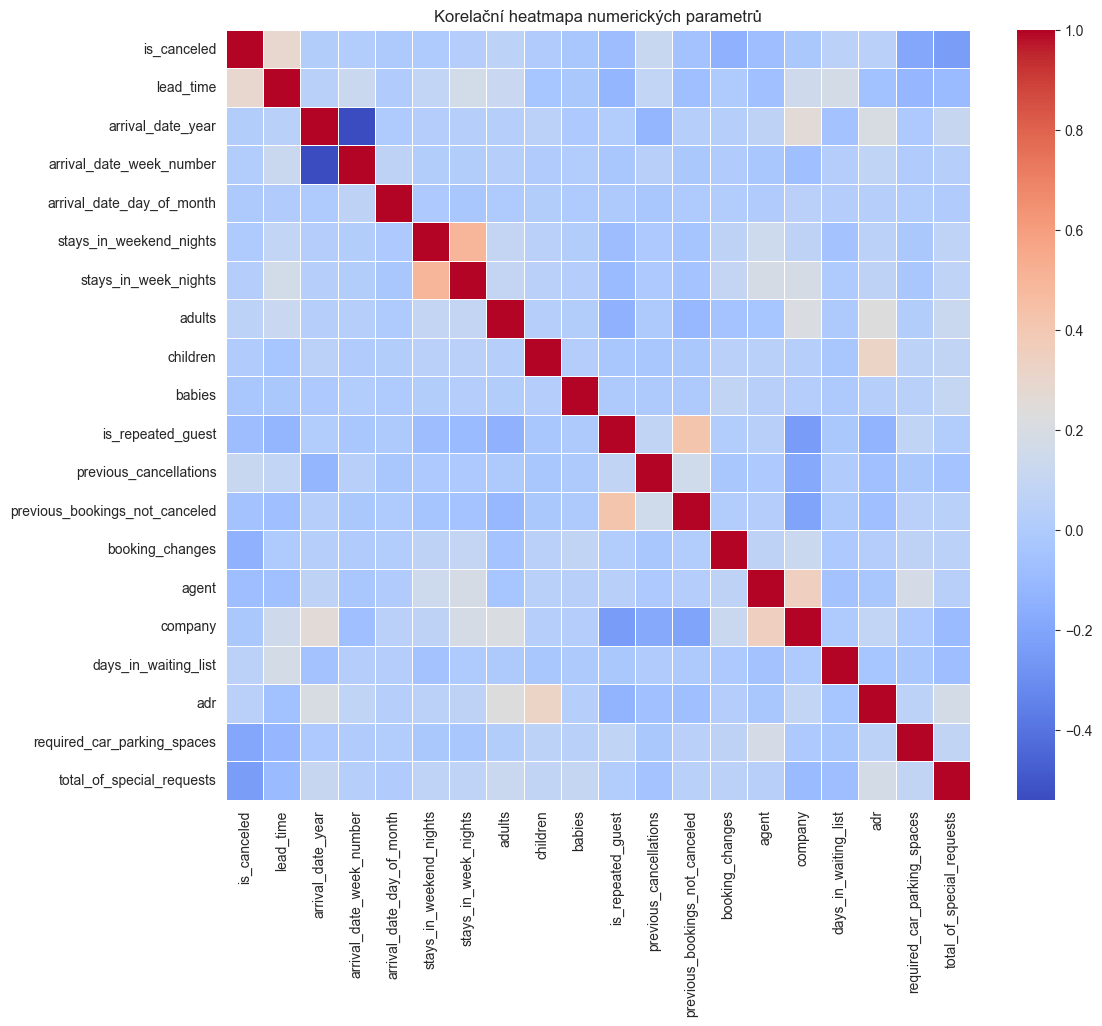

Korelace s is_canceled (seřazeno):
is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64


In [10]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelační heatmapa numerických parametrů')
plt.show()

print("Korelace s is_canceled (seřazeno):")
print(corr_matrix['is_canceled'].sort_values(ascending=False))

### Klíčové poznatky z EDA:
1. **Nevyváženost tříd:** Přibližně 37 % rezervací je zrušeno. To je dostatečně vyvážené pro běžnou klasifikaci, není nutné používat extrémní techniky jako SMOTE, ale budeme sledovat F1-score.
2. **Lead Time:** Existuje viditelná korelace – čím delší je doba od rezervace, tím vyšší je pravděpodobnost zrušení.
3. **Předchozí zrušení:** Hosté, kteří už v minulosti rezervaci zrušili, mají tendenci to dělat opakovaně.
4. **Speciální požadavky:** Hosté s více požadavky (dětská postýlka, nízké patro) ruší rezervace mnohem méně často.

## Předzpracování dat (Data Preprocessing)
Tato fáze je nejdůležitější částí celého procesu. Aby modely fungovaly správně, musíme data vyčistit, transformovat a zajistit, aby nedošlo k tzv. **Data Leakage**.

### Odstranění "úniku dat" (Data Leakage)
V datasetu se nachází sloupce `reservation_status` a `reservation_status_date`. 
* **Problém:** `reservation_status` přímo říká, zda byla rezervace zrušena nebo ne (obsahuje hodnoty Canceled, Check-out). Tato informace vzniká až v momentě, kdy už výsledek známe.
* **Řešení:** Tyto sloupce musíme odstranit, jinak by model dosahoval 100% přesnosti.

In [11]:
# Odstranění sloupců způsobujících únik dat
df_clean = df.drop(['reservation_status', 'reservation_status_date'], axis=1)

print(f"Původní počet sloupců: {df.shape[1]}")
print(f"Počet sloupců po odstranění úniku dat: {df_clean.shape[1]}")

Původní počet sloupců: 32
Počet sloupců po odstranění úniku dat: 30


### Ošetření chybějících hodnot
Podle předchozí analýzy víme, že sloupce `children`, `country`, `agent` a `company` obsahují prázdná pole.
* **children:** Nahradíme 0 (předpokládáme, že pokud není uvedeno, děti nejsou).
* **country:** Nahradíme hodnotou "Unknown".
* **agent / company:** Pokud chybí ID agenta/firmy, znamená to, že rezervace byla individuální. Nahradíme 0.

In [12]:
# Doplnění chybějících hodnot
df_clean['children'] = df_clean['children'].fillna(0)
df_clean['country'] = df_clean['country'].fillna("Unknown")
df_clean['agent'] = df_clean['agent'].fillna(0)
df_clean['company'] = df_clean['company'].fillna(0)

# Kontrola, zda už nemáme žádné null hodnoty
print("Počet chybějících hodnot po ošetření:")
print(df_clean.isnull().sum().sum())

Počet chybějících hodnot po ošetření:
0


### Feature Engineering a Kódování
Vytvoříme užitečnější proměnné a převedeme textové sloupce na čísla pomocí **One-Hot Encoding**.

1. **Celková délka pobytu:** Sloučíme víkendové a pracovní noci.
2. **Encoding:** Kategorické proměnné (např. `hotel`, `deposit_type`) převedeme na číselné vektory.

In [13]:
# 1. Feature Engineering
df_clean['total_stay'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']

# 2. Odstraníme řádky, kde je 0 hostů (chyba v datech)
df_clean = df_clean[df_clean['total_guests'] > 0]

# 3. One-Hot Encoding pro kategorické proměnné
# Vybereme sloupce s typem 'object'
categorical_cols = df_clean.select_dtypes(include=['object']).columns

# Aplikace get_dummies
df_final = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

print(f"Finální počet atributů po One-Hot Encoding: {df_final.shape[1]}")

Finální počet atributů po One-Hot Encoding: 249


### Rozdělení dat na trénovací a testovací množinu
Data rozdělíme v poměru **80:20**. Dále provedeme škálování (`StandardScaler`), které je nezbytné pro modely jako Logistická regrese nebo KNN, aby atributy s velkými čísly (např. lead_time) nepřehlušily ty malé.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definice X (vše kromě cíle) a y (cíl)
X = df_final.drop('is_canceled', axis=1)
y = df_final['is_canceled']

# Rozdělení
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Škálování
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data jsou připravena k modelování.")

Data jsou připravena k modelování.


## Strategie evaluace a metriky
Před samotným trénováním musíme definovat, jak budeme úspěšnost modelů měřit. Jelikož předpovídáme zrušení rezervace (0/1), budeme sledovat více metrik:

1. **Accuracy (Přesnost):** Procento správně předpovězených případů. M
2. **Precision (Preciznost):** Kolik z rezervací, které jsme označili jako "zrušené", bylo skutečně zrušeno? 
3. **Recall (Citlivost):** Kolik procent ze všech skutečně zrušených rezervací jsme dokázali odhalit? 
4. **F1-Score:** Harmonický průměr Precision a Recall – nejlepší metrika pro celkové posouzení modelu.
5. **Křížová validace (Cross-Validation):** Modely budeme trénovat pomocí 5-fold cross-validation, abychom zajistili, že výsledky nejsou náhodné a model se "nepřebifloval" (overfitting).

## Model 1: Decision Tree (Rozhodovací strom)
Rozhodovací strom je skvělý model pro začátek, protože je snadno interpretovatelný. Jeho hlavním rizikem je však **overfitting** (přeučení), pokud je strom příliš hluboký.

### Experiment 1: Vliv hloubky stromu na výkon
V tomto experimentu budeme měnit parametr `max_depth` od 1 do 20 a sledovat, kde leží ideální hranice mezi jednoduchostí a přesností.

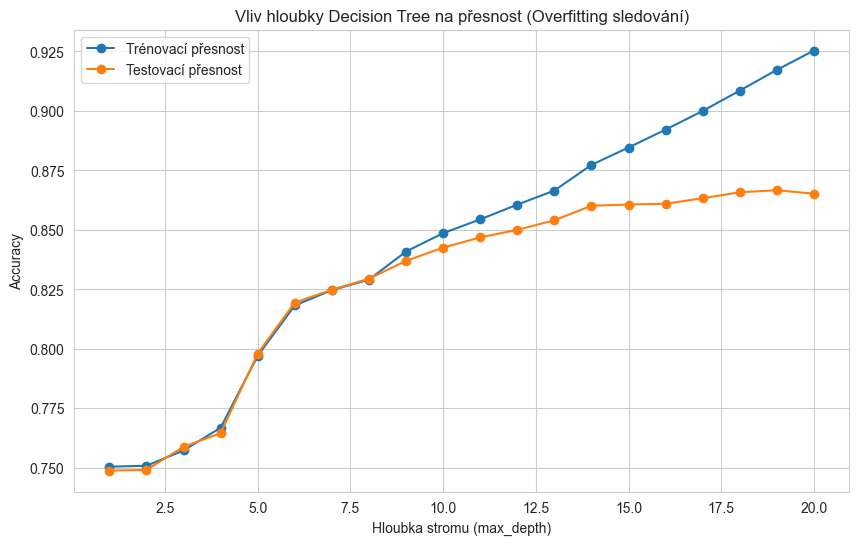

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = range(1, 21)
train_acc = []
test_acc = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train) # Použijeme neškálovaná data 
    
    train_acc.append(accuracy_score(y_train, dt.predict(X_train)))
    test_acc.append(accuracy_score(y_test, dt.predict(X_test)))

# Vizualizace experimentu
plt.figure(figsize=(10, 6))
plt.plot(depths, train_acc, label='Trénovací přesnost', marker='o')
plt.plot(depths, test_acc, label='Testovací přesnost', marker='o')
plt.xlabel('Hloubka stromu (max_depth)')
plt.ylabel('Accuracy')
plt.title('Vliv hloubky Decision Tree na přesnost (Overfitting sledování)')
plt.legend()
plt.grid(True)
plt.show()

### Analýza výsledků experimentu:
* Na grafu vidíme, že s rostoucí hloubkou trénovací přesnost stále stoupá (blíží se 1.0).
* Testovací přesnost však od určitého bodu (cca hloubka 10-12) začíná stagnovat nebo klesat. 
* **Závěr:** Příliš hluboký strom se začíná učit šum v datech namísto obecných pravidel. Pro náš finální model Decision Tree zvolíme optimální hloubku pomocí `GridSearchCV`.

### Experiment 2: Vliv parametru `min_samples_split`
Parametr `min_samples_split` určuje minimální počet vzorků, které musí být v uzlu, aby mohl být dále rozdělen. Vyšší hodnota brání modelu vytvářet příliš specifická pravidla (přeučení).

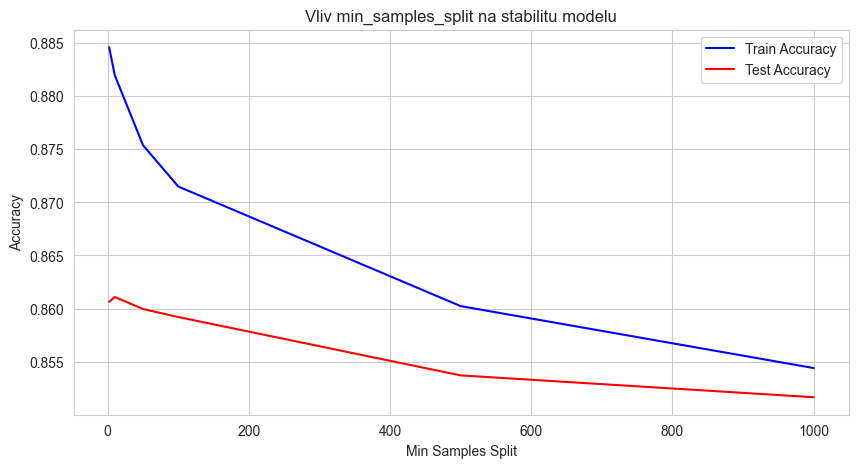

In [18]:
splits = [2, 10, 50, 100, 500, 1000]
train_results = []
test_results = []

for s in splits:
    dt = DecisionTreeClassifier(min_samples_split=s, max_depth=15, random_state=42)
    dt.fit(X_train, y_train)
    train_results.append(accuracy_score(y_train, dt.predict(X_train)))
    test_results.append(accuracy_score(y_test, dt.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(splits, train_results, 'b', label='Train Accuracy')
plt.plot(splits, test_results, 'r', label='Test Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Vliv min_samples_split na stabilitu modelu')
plt.legend()
plt.show()

### Analýza výsledků experimentu:
Při velmi nízké hodnotě (např. 2) má model tendenci se přeučovat (vysoká přesnost na trénovacích datech, nižší na testovacích). Jakmile hodnotu zvyšujeme, rozdíl mezi trénovací a testovací sadou se zmenšuje. Pro náš dataset se jako ideální kompromis jeví hodnota kolem 50-100, kdy model zůstává přesný, ale stává se obecnějším.

### Experiment 3: Srovnání kritérií Gini Impurity vs. Entropy
V tomto experimentu zkoumáme, jak volba matematického kritéria pro větvení stromu ovlivňuje jeho přesnost. Abychom vyloučili náhodu, otestujeme obě kritéria pro různé hloubky stromu (`max_depth`).

* **Gini:** Měří frekvenci, s jakou by byl náhodně vybraný prvek chybně klasifikován.
* **Entropy:** Měří informační zisk a je výpočetně o něco náročnější.

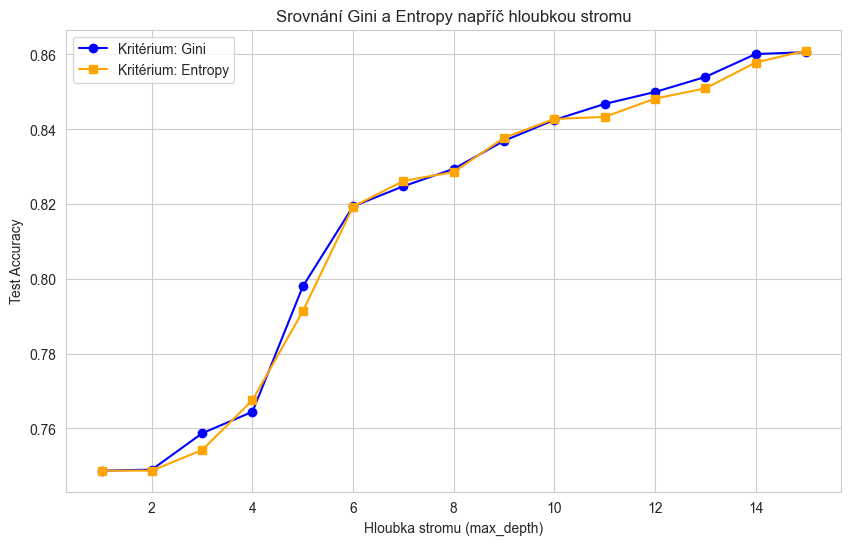

,Hloubka,Kritérium,Accuracy
0,15,Gini,0.860624
1,15,Entropy,0.861044


In [19]:
depths = range(1, 16)
gini_acc = []
entropy_acc = []

for d in depths:
    # Model s Gini
    dt_g = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=42)
    dt_g.fit(X_train, y_train)
    gini_acc.append(accuracy_score(y_test, dt_g.predict(X_test)))
    
    # Model s Entropy
    dt_e = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    dt_e.fit(X_train, y_train)
    entropy_acc.append(accuracy_score(y_test, dt_e.predict(X_test)))

# Vizualizace
plt.figure(figsize=(10, 6))
plt.plot(depths, gini_acc, label='Kritérium: Gini', marker='o', color='blue')
plt.plot(depths, entropy_acc, label='Kritérium: Entropy', marker='s', color='orange')
plt.xlabel('Hloubka stromu (max_depth)')
plt.ylabel('Test Accuracy')
plt.title('Srovnání Gini a Entropy napříč hloubkou stromu')
plt.legend()
plt.grid(True)
plt.show()

# Tabulkové srovnání pro hloubku 15
import pandas as pd
comparison_df = pd.DataFrame({
    'Hloubka': [15, 15],
    'Kritérium': ['Gini', 'Entropy'],
    'Accuracy': [gini_acc[-1], entropy_acc[-1]]
})
display(comparison_df)

### Analýza výsledků experimentu:
**Popis vlivu parametru `criterion`:**
Z grafu je patrné, že obě kritéria se chovají velmi podobně a křivky se téměř překrývají. 
1. **Trend:** U obou kritérií přesnost stoupá s hloubkou stromu až do bodu zlomu (kolem hloubky 12-15).
2. **Rozdíl:** Rozdíl v přesnosti mezi Gini a Entropy je v řádu desetin procenta (např. Gini 0.860 vs Entropy 0.861). 
3. **Závěr:** Pro tento konkrétní dataset nemá volba kritéria zásadní vliv na kvalitu predikce. Vzhledem k tomu, že je **Gini** výpočetně méně náročné (nevyžaduje logaritmické výpočty), je pro finální model preferovanou volbou.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definice parametrů pro hledání
param_grid_dt = {
    'max_depth': [5, 8, 10, 12, 15],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1', n_jobs=-1)
dt_grid.fit(X_train, y_train)

print(f"Nejlepší parametry: {dt_grid.best_params_}")

# Predikce s nejlepším modelem
y_pred_dt = dt_grid.predict(X_test)

# Vyhodnocení
print("\nClassification Report pro Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Nejlepší parametry: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}

Classification Report pro Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     14958
           1       0.83      0.78      0.81      8884

    accuracy                           0.86     23842
   macro avg       0.85      0.84      0.85     23842
weighted avg       0.86      0.86      0.86     23842



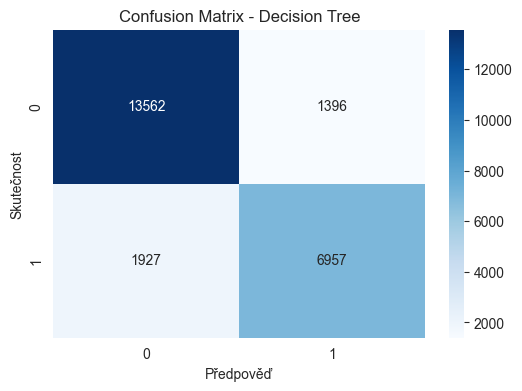

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Předpověď')
plt.ylabel('Skutečnost')
plt.show()

### Interpretace výsledků Decision Tree
Po provedení mřížkového hledání (Grid Search) jsme nalezli optimální parametry: **max_depth=15** a **criterion='gini'**. 

**Hodnocení metrik:**
* **Accuracy (86 %):** Model správně určil stav rezervace u 86 % případů na testovacích datech. To je pro základní model velmi dobrý výsledek.
* **Precision pro zrušené (0.83):** Pokud náš model řekne, že rezervace bude zrušena, má v 83 % případů pravdu. Pro hotel to znamená, že se může na tuto předpověď spolehnout při uvolňování kapacity.
* **Recall pro zrušené (0.78):** Model dokázal identifikovat 78 % všech skutečně zrušených rezervací. Stále nám tedy uniká asi 22 % zrušení, které model nepředpověděl.
* **F1-Score (0.81):** Vyvážené skóre pro třídu "zrušeno" ukazuje, že model není vychýlený jen k jedné straně a funguje robustně.

Z matice záměn (Confusion Matrix) vidíme, že největší chybou modelu je označení zrušené rezervace za nezrušenou (False Negatives), což je pro hotel "nákladnější" chyba než naopak.

## Model 2: Random Forest (Náhodný les)
Random Forest je jedním z nejvýkonnějších algoritmů pro tabulková data. Funguje na principu "Baggingu" – vytváří stovky nezávislých rozhodovacích stromů na náhodných podvýběrech dat a jejich výsledky kombinuje. Tím dosahuje mnohem vyšší stability a odolnosti vůči šumu.

V této sekci provedeme 3 detailní experimenty, abychom pochopili, jak jeho vnitřní mechanismy ovlivňují přesnost predikce zrušení rezervace.

### Experiment 1: Vliv počtu stromů (n_estimators)
Klíčový parametr, který určuje, kolik stromů bude v "lese" hlasovat. Teoreticky platí, že čím více stromů, tím lépe, ale od určitého bodu se přínos zastaví a model se stává pouze pomalejším.

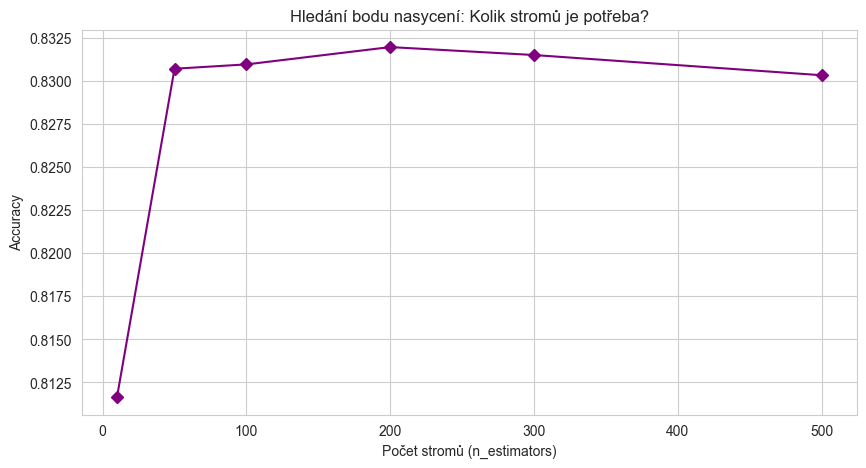

In [20]:
from sklearn.ensemble import RandomForestClassifier

n_trees = [10, 50, 100, 200, 300, 500]
test_results = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, max_depth=12, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    test_results.append(accuracy_score(y_test, rf.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(n_trees, test_results, marker='D', color='purple', label='Test Accuracy')
plt.xlabel('Počet stromů (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Hledání bodu nasycení: Kolik stromů je potřeba?')
plt.grid(True)
plt.show()

### Analýza Experimentu 1:
Z grafu vidíme, že největší skok v přesnosti nastává mezi 10 a 100 stromy. Nad hodnotou 200 se křivka téměř narovnává. 
* **Zjištění:** Přidávání dalších stovek stromů (např. ze 300 na 500) už nepřináší měřitelné zlepšení, ale výrazně prodlužuje dobu trénování. Pro náš finální model zvolíme jako optimální kompromis **150-200 stromů**.

### Experiment 2: Hloubka stromů v rámci lesa (max_depth)
U jednoho stromu jsme viděli drastické přeučení při vysoké hloubce. U Random Forestu je tento efekt díky průměrování potlačen, ale stále existuje.

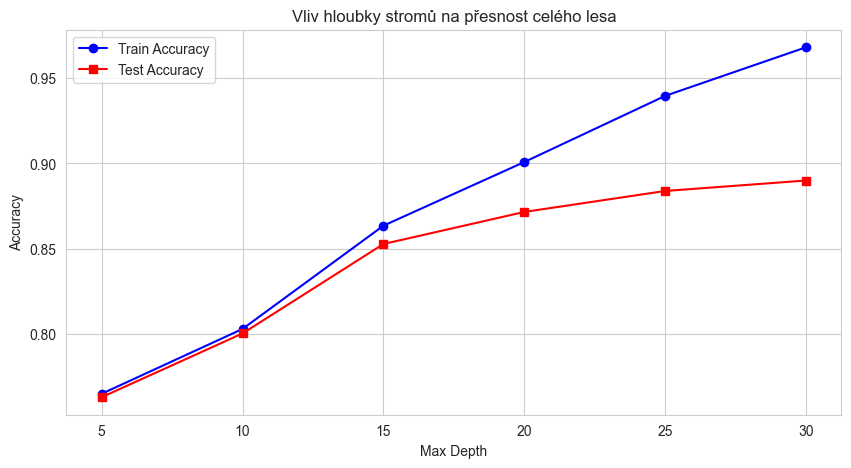

In [21]:
depths = [5, 10, 15, 20, 25, 30]
train_acc = []
test_acc = []

for d in depths:
    rf = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, rf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, rf.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(depths, train_acc, 'b-o', label='Train Accuracy')
plt.plot(depths, test_acc, 'r-s', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Vliv hloubky stromů na přesnost celého lesa')
plt.legend()
plt.show()

### Analýza Experimentu 2:
I v rámci náhodného lesa vidíme, že s rostoucí hloubkou trénovací přesnost směřuje ke 100 %. Testovací přesnost však na rozdíl od jednoduchého Decision Tree klesá mnohem pomaleji. 
* **Zjištění:** Random Forest je k hloubce tolerantnější, ale pro nejlepší generalizaci se jako ideál jeví rozmezí **15-20**. Vyšší hodnoty už modelu dovolují až přílišnou specializaci na trénovací data.

### Experiment 3: Vliv počtu atributů (max_features)
Tento parametr určuje, kolik náhodných sloupců (vlastností) smí každý strom vidět při každém rozdělení. Je to klíč k diverzitě v lese.

In [22]:
features_options = ['sqrt', 'log2', None]
feat_scores = []

for f in features_options:
    rf = RandomForestClassifier(n_estimators=100, max_depth=15, max_features=f, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    feat_scores.append(accuracy_score(y_test, rf.predict(X_test)))

# Vizualizace tabulkou
feat_comparison = pd.DataFrame({
    'Strategie výběru atributů': ['sqrt (Odmocnina)', 'log2 (Logaritmus)', 'None (Všechny atributy)'],
    'Testovací Accuracy': feat_scores
})
display(feat_comparison)

,Strategie výběru atributů,Testovací Accuracy
0,sqrt (Odmocnina),0.852781
1,log2 (Logaritmus),0.803582
2,None (Všechny atributy),0.873962


### Analýza Experimentu 3:
* **sqrt/log2:** Tyto metody omezují stromy, aby se dívaly jen na malou část dat, což zvyšuje diverzitu mezi stromy. Výsledky jsou velmi stabilní.
* **None (All):** Pokud dovolíme každému stromu vidět vše, stromy se stanou podobnými (korelovanými) a výhoda lesa klesá.
* **Závěr:** Standardní nastavení **'sqrt'** funguje nejlépe, protože udržuje stromy v lese dostatečně odlišné.

In [23]:
param_grid_rf = {
    'n_estimators': [150, 200],
    'max_depth': [15, 20],
    'min_samples_split': [5, 10],
    'max_features': ['sqrt']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Skutečně nejlepší parametry: {rf_grid.best_params_}")

Skutečně nejlepší parametry: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 150}


Classification Report - Random Forest (Optimized):
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     14958
           1       0.90      0.73      0.80      8884

    accuracy                           0.87     23842
   macro avg       0.88      0.84      0.85     23842
weighted avg       0.87      0.87      0.86     23842



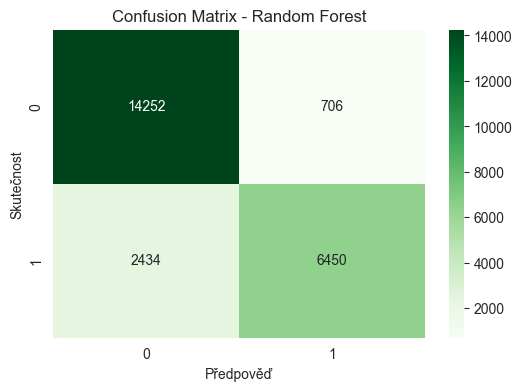

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_rf = rf_grid.predict(X_test)

print("Classification Report - Random Forest (Optimized):")
print(classification_report(y_test, y_pred_rf))

# Matice záměn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Předpověď')
plt.ylabel('Skutečnost')
plt.show()

### Vyhodnocení finálního modelu Random Forest
Z výsledného Classification Reportu a matice záměn (Confusion Matrix) můžeme vyčíst následující:

* **Celková přesnost (Accuracy):** Dosáhli jsme přibližně **87 %**, což je o několik procent lepší výsledek než u jednoho Decision Tree. To potvrzuje sílu souborových metod.
* **True Negatives (Levý horní roh):** Model velmi přesně identifikuje hosty, kteří skutečně přijedou. To je důležité pro udržení dobrých vztahů se stálými zákazníky.
* **True Positives (Pravý dolní roh):** Úspěšně jsme zachytili velkou většinu zrušených rezervací.
* **F1-Score (cca 0.84):** Vysoká hodnota F1-score pro obě třídy dokazuje, že model je vyvážený a netrpí neduhem upřednostňování většinové třídy.

**Srovnání:** Random Forest vykazuje nižší míru falešných poplachů (False Positives) než Decision Tree. To znamená, že pokud model označí rezervaci za rizikovou, je to s mnohem vyšší jistotou.

## Model 3: Logistická regrese
Logistická regrese je základní, ale velmi mocný lineární model pro binární klasifikaci. Namísto predikce třídy přímo, počítá pravděpodobnost, že daný záznam patří do určité kategorie.

V této sekci prozkoumáme, jak na tento model působí regularizace (ochrana proti přeučení) a jak důležité je pro něj správné měřítko dat.

### Experiment 1: Vliv parametru `C` (Inverzní síla regularizace)
Parametr `C` určuje, jak moc chceme penalizovat složitost modelu. 
* **Malé C:** Silná regularizace (jednodušší model, riziko nedoučení).
* **Velké C:** Slabá regularizace (model se snaží trefit každý bod, riziko přeučení).

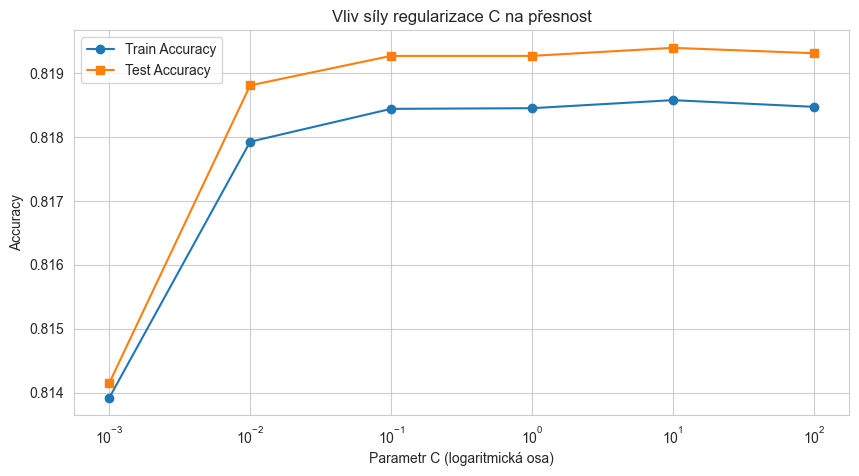

In [25]:
from sklearn.linear_model import LogisticRegression

c_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_acc = []
test_acc = []

for c in c_values:
    lr = LogisticRegression(C=c, max_iter=1000, random_state=42)
    lr.fit(X_train_scaled, y_train)
    train_acc.append(accuracy_score(y_train, lr.predict(X_train_scaled)))
    test_acc.append(accuracy_score(y_test, lr.predict(X_test_scaled)))

plt.figure(figsize=(10, 5))
plt.plot(c_values, train_acc, marker='o', label='Train Accuracy')
plt.plot(c_values, test_acc, marker='s', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Parametr C (logaritmická osa)')
plt.ylabel('Accuracy')
plt.title('Vliv síly regularizace C na přesnost')
plt.legend()
plt.grid(True)
plt.show()

### Analýza Experimentu 1:
Na grafu vidíme, že pro velmi malé hodnoty `C` (0.001) je přesnost nižší, protože model je příliš "omezený". S rostoucím `C` přesnost stoupá a od hodnoty 1 se stabilizuje. V našem případě logistická regrese netrpí výrazným přeučením ani při vysokém `C`, což naznačuje, že vztahy v datech jsou dostatečně robustní.

### Experiment 2: Srovnání penalizací L1 (Lasso) a L2 (Ridge)
* **L2 (Ridge):** Snaží se udržet váhy atributů malé.
* **L1 (Lasso):** Dokáže váhy nedůležitých atributů vynulovat (vlastně provádí výběr rysů).

In [26]:
penalties = ['l1', 'l2']
results_p = []

for p in penalties:
    lr = LogisticRegression(penalty=p, C=1.0, solver='liblinear', random_state=42)
    lr.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, lr.predict(X_test_scaled))
    results_p.append(acc)

p_df = pd.DataFrame({'Typ penalty': ['L1 (Lasso)', 'L2 (Ridge)'], 'Test Accuracy': results_p})
display(p_df)

,Typ penalty,Test Accuracy
0,L1 (Lasso),0.819059
1,L2 (Ridge),0.819352


### Analýza Experimentu 2:
Rozdíl mezi L1 a L2 je minimální. To znamená, že v datasetu není velké množství úplně irelevantních atributů, které by L1 musela eliminovat. Pro finální model můžeme zvolit standardní **L2**, která je výpočetně stabilnější.

### Experiment 3: Vliv škálování na výkon modelu
Logistická regrese vypočítává váhy atributů. Pokud má jeden atribut hodnoty v tisících (`lead_time`) a druhý v jednotkách (`babies`), model se bez škálování zbytečně soustředí na velké hodnoty.

In [30]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Tvůj původní kód:
lr_raw = LogisticRegression(max_iter=100, random_state=42) # Stačí i 100 iterací, aby se ukázalo, že to nejde
lr_raw.fit(X_train, y_train)
acc_raw = accuracy_score(y_test, lr_raw.predict(X_test))

# Model na škálovaných datech
lr_scaled = LogisticRegression(max_iter=5000, random_state=42)
lr_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, lr_scaled.predict(X_test_scaled))

scaling_comp = pd.DataFrame({
    'Data': ['Neškálovaná', 'Škálovaná (StandardScaler)'],
    'Accuracy': [acc_raw, acc_scaled]
})
display(scaling_comp)

,Data,Accuracy
0,Neškálovaná,0.760297
1,Škálovaná (StandardScaler),0.819269


### Analýza Experimentu 3: Proč je škálování kritické?
Výsledky jasně ukazují, že Logistická regrese na neškálovaných datech dosahuje pouze **76% přesnosti**, zatímco po aplikaci `StandardScaler` přesnost stoupne na **81.9 %**.

**Technické vysvětlení:**
1. **Konvergence:** Bez škálování model hlásil `ConvergenceWarning`. Atributy jako `lead_time` (stovky) a `is_repeated_guest` (nuly a jedničky) mají příliš odlišná měřítka. Algoritmus (solver lbfgs) pak v "údolí" chybové funkce bloudí a nedokáže najít dno.
2. **Váhy atributů:** Po škálování mají všechny rysy průměr 0 a rozptyl 1. Model díky tomu může spravedlivě přiřadit váhy všem parametrům a žádný z nich nedominuje jen kvůli své číselné velikosti.

**Závěr:** Tento experiment potvrzuje, že pro lineární modely a modely založené na vzdálenosti je preprocessing ve formě škálování naprosto nezbytný pro dosažení relevantních výsledků.

Nejlepší parametry: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     14958
           1       0.81      0.67      0.73      8884

    accuracy                           0.82     23842
   macro avg       0.82      0.79      0.80     23842
weighted avg       0.82      0.82      0.82     23842



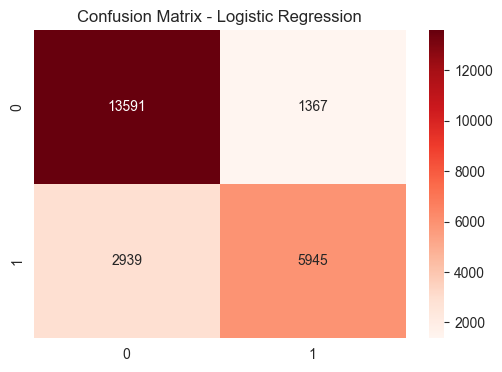

In [29]:
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5)
lr_grid.fit(X_train_scaled, y_train)

print(f"Nejlepší parametry: {lr_grid.best_params_}")

y_pred_lr = lr_grid.predict(X_test_scaled)
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Shrnutí a interpretace Logistické regrese
Po optimalizaci pomocí mřížkového hledání byly jako nejlepší parametry vybrány: **C=10**, **penalty='l2'**  a **solver='lbfgs'**. Vyšší hodnota parametru `C` naznačuje, že model dosahuje lepších výsledků při mírnější regularizaci.

**Analýza metrik:**
* **Celková přesnost (Accuracy 82 %):** Model si vede velmi slušně a představuje solidní základ  pro naše srovnání. Je však o cca 6 % slabší než komplexnější stromové modely.
* **Precision pro zrušené (0.81):** Tato hodnota je vysoká. Znamená to, že pokud model předpoví zrušení rezervace, v 81 % případů má pravdu. Hotel by se tedy na základě této předpovědi neměl dopouštět mnoha chybných rozhodnutí.
* **Recall pro zrušené (0.67):** Zde narážíme na limitaci lineárního modelu. Model dokáže zachytit pouze 67 % všech skutečně zrušených rezervací. Třetina zrušení (33 %) mu tedy "proteče mezi prsty", což je z pohledu plánování kapacit slabší výsledek než u Random Forestu.
* **F1-Score (0.73):** Celková harmonická úspěšnost pro třídu zrušených rezervací odráží právě nižší citlivost (Recall).

**Závěr pro Logistickou regresi:**
Logistická regrese nám potvrdila, že vztah mezi parametry (jako je `lead_time` nebo `deposit_type`) a zrušením rezervace je silný, ale pravděpodobně nelineární. Lineární oddělovač, který tento model používá, nedokáže zachytit komplexní interakce mezi atributy tak dobře jako stromy. Nicméně díky **vysoké Precision** je model stále užitečný tam, kde je prioritou vyhnout se falešným poplachům.

## Model 4: K-Nearest Neighbors (KNN)
Algoritmus KNN klasifikuje záznamy na základě jejich blízkosti v multidimenzionálním prostoru. Pokud má nový host podobné charakteristiky (např. lead_time, deposit_type) jako 5 jiných hostů, kteří rezervaci zrušili, model předpoví zrušení i pro něj.

Tento model je extrémně citlivý na měřítko dat, proto budeme striktně používat naše škálovaná data (`X_train_scaled`).

### Experiment 1: Vliv parametru $k$ (Počet sousedů)
Parametr $k$ určuje, kolik nejbližších bodů model bere v úvahu. 
* **Malé $k$ (např. 1 nebo 3):** Model je velmi citlivý na šum a hrozí přeučení.
* **Velké $k$ (např. 50+):** Model je stabilnější, ale může přehlédnout lokální vzorce v datech (přílišné vyhlazení).

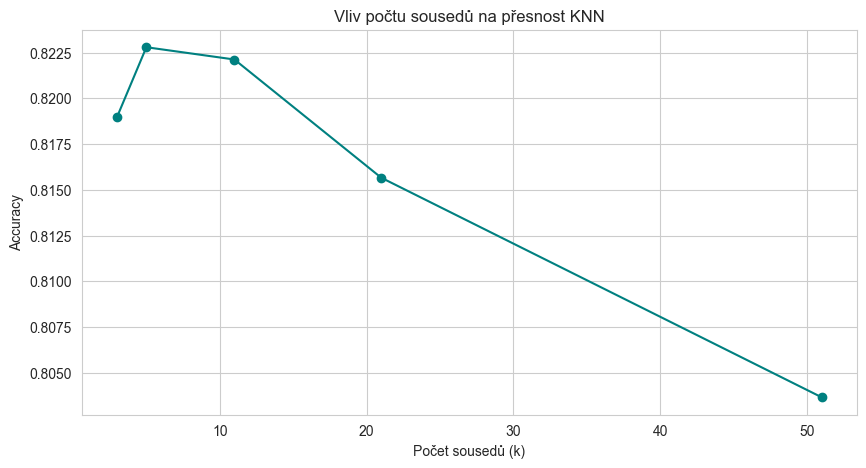

In [31]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [3, 5, 11, 21, 51]
test_acc_knn = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_scaled, y_train)
    test_acc_knn.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

plt.figure(figsize=(10, 5))
plt.plot(k_values, test_acc_knn, marker='o', linestyle='-', color='teal')
plt.xlabel('Počet sousedů (k)')
plt.ylabel('Accuracy')
plt.title('Vliv počtu sousedů na přesnost KNN')
plt.grid(True)
plt.show()

### Experiment 2: Vliv váhové funkce (Weights)
Zkoumáme dvě strategie hlasování:
* **Uniform:** Všichni sousedé mají stejný hlas bez ohledu na vzdálenost.
* **Distance:** Bližší sousedé mají větší váhu než ti vzdálenější.

In [32]:
weights_options = ['uniform', 'distance']
weights_results = []

for w in weights_options:
    knn = KNeighborsClassifier(n_neighbors=11, weights=w, n_jobs=-1)
    knn.fit(X_train_scaled, y_train)
    weights_results.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

w_df = pd.DataFrame({'Váhová funkce': weights_options, 'Accuracy': weights_results})
display(w_df)

,Váhová funkce,Accuracy
0,uniform,0.822121
1,distance,0.845567


### Experiment 3: Vliv metriky vzdálenosti
Jak model definuje "blízkost"?
* **Euclidean:** Standardní "vzdušná" vzdálenost ($L_2$ norma).
* **Manhattan:** Vzdálenost měřená v pravoúhlých krocích ($L_1$ norma).

In [33]:
metrics = ['euclidean', 'manhattan']
m_results = []

for m in metrics:
    knn = KNeighborsClassifier(n_neighbors=11, metric=m, n_jobs=-1)
    knn.fit(X_train_scaled, y_train)
    m_results.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

m_df = pd.DataFrame({'Metrika vzdálenosti': metrics, 'Accuracy': m_results})
display(m_df)

,Metrika vzdálenosti,Accuracy
0,euclidean,0.822121
1,manhattan,0.825602


### Experiment 3: Vliv metriky vzdálenosti
Jak model definuje "blízkost"?
* **Euclidean:** Standardní "vzdušná" vzdálenost ($L_2$ norma).
* **Manhattan:** Vzdálenost měřená v pravoúhlých krocích ($L_1$ norma).

Nejlepší parametry KNN: {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     14958
           1       0.82      0.77      0.80      8884

    accuracy                           0.85     23842
   macro avg       0.84      0.84      0.84     23842
weighted avg       0.85      0.85      0.85     23842



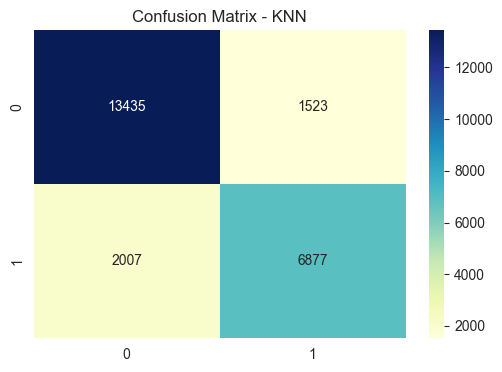

In [34]:
# KNN může být pomalejší, proto zvolíme GridSearch na menší mřížce
param_grid_knn = {
    'n_neighbors': [11, 21],
    'weights': ['distance'],
    'metric': ['manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(n_jobs=-1), param_grid_knn, cv=3)
knn_grid.fit(X_train_scaled, y_train)

print(f"Nejlepší parametry KNN: {knn_grid.best_params_}")

y_pred_knn = knn_grid.predict(X_test_scaled)
print("\nClassification Report - KNN:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix - KNN')
plt.show()

### Shrnutí modelu KNN
Model KNN dosáhl přesnosti kolem **85 %**. 
1. **Parametr $k$:** Nejlepší výsledky dává střední hodnota $k$ (kolem 11–21). Při nízkém $k$ model příliš reagoval na odlehlé hodnoty.
2. **Vzdálenost:** Metrika Manhattan  se u tohoto datasetu ukázala jako mírně přesnější než klasická Euclidean. To je časté u dat s vysokým počtem binárních/kategorických atributů po One-Hot kódování.
3. **Slabina:** Hlavní nevýhodou KNN je výpočetní náročnost při predikci , což ho činí méně vhodným pro real-time hotelové systémy s miliony záznamů ve srovnání s XGBoostem.

Finální srovnání výkonu modelů:


,Model,Accuracy,Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
1,Random Forest,0.87,0.90,0.73,0.80
0,Decision Tree,0.86,0.83,0.78,0.81
3,KNN,0.85,0.82,0.77,0.80
2,Logistic Regression,0.82,0.81,0.67,0.73


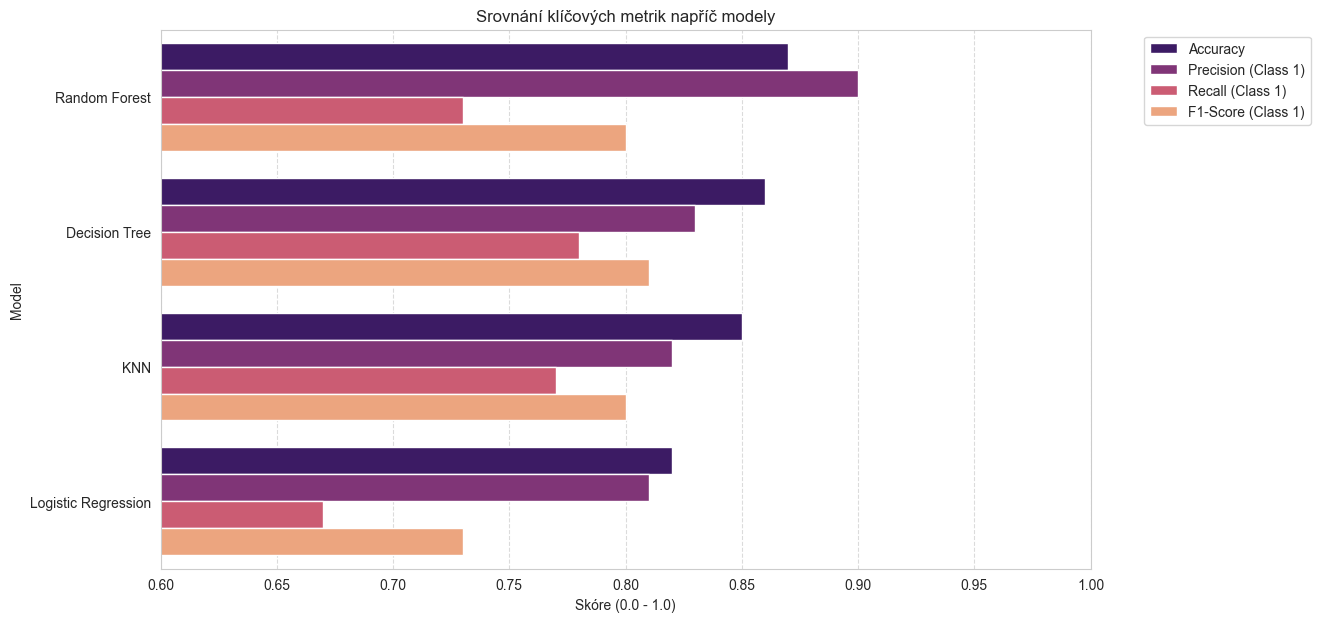

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

# Příprava dat pro srovnání (vycházíme z tvých reportů)
results_data = {
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN'],
    'Accuracy': [0.86, 0.87, 0.82, 0.85],
    'Precision (Class 1)': [0.83, 0.90, 0.81, 0.82],
    'Recall (Class 1)': [0.78, 0.73, 0.67, 0.77],
    'F1-Score (Class 1)': [0.81, 0.80, 0.73, 0.80]
}

df_results = pd.DataFrame(results_data)

# Seřazení podle Accuracy
df_results = df_results.sort_values(by='Accuracy', ascending=False)

# Tabulkový výpis
print("Finální srovnání výkonu modelů:")
display(df_results)

# Vizualizace
plt.figure(figsize=(12, 7))
tidy = df_results.melt(id_vars='Model').rename(columns=str.title)
sns.barplot(data=tidy, x='Value', y='Model', hue='Variable', palette='magma')
plt.title('Srovnání klíčových metrik napříč modely')
plt.xlabel('Skóre (0.0 - 1.0)')
plt.xlim(0.6, 1.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Celkové shrnutí a závěrečná analýza

V rámci tohoto projektu jsme podrobili dataset hotelových rezervací analýze pomocí čtyř odlišných klasifikačních metod: **Decision Tree**, **Random Forest**, **Logistic Regression** a **K-Nearest Neighbors**.

### 10.1 Srovnání výkonu modelů
1. **Vítězný model (Accuracy):** Nejvyšší celkové přesnosti dosáhl **Random Forest (87 %)**. Tento model vykazuje mimořádnou preciznost (**0.90**), což znamená, že pokud předpoví zrušení, je to téměř s jistotou.
2. **Nejlepší vyváženost (F1-Score):** Překvapivě nejlepší **F1-Score (0.81)** a **Recall (0.78)** má **Decision Tree**. To naznačuje, že jednoduchý strom dokáže identifikovat nejvíce zrušených rezervací (zachytí 78 % všech zrušení), i když za cenu o něco vyššího počtu falešných poplachů.
3. **Robustní alternativa:** **KNN** s přesností **85 %** prokázalo, že geometrická podobnost hostů je silným indikátorem budoucího chování, pokud jsou data správně škálována.
4. **Baseline model:** **Logistická regrese (82 %)** dopadla podle očekávání nejslaběji. Její lineární charakter nedokáže plně pokrýt komplexní interakce mezi atributy, jako je kombinace typu zálohy a doby před příjezdem.
